In [4]:
import plotly.express as px
from mongo import db
from mongo.repository.resultados_trains_repository import RepositoryMongoResultadoTrain
import gridfs
import json

repo = RepositoryMongoResultadoTrain()
grid = gridfs.GridFS(db.bd, 'resultados_train_gridfs_revista')

In [88]:
modelos = repo.find_many({'initial_position': 'best', 'area_algoritmo': 9})

In [89]:
for x in modelos:
    x.resultados_raw = json.loads(grid.get_last_version(x.name_gridfs).read())

In [90]:
d = {}
for m in modelos:
    results = []
    for x, y in enumerate(m.resultados_raw):
        results.append((x, y['episode_reward_max'], y['episode_reward_mean'], y['episode_reward_min']))
    # l = ''
    # if m.size_square_obs == -1:
    #     print(1)
    #     l = 'Complete information'
    # else:
    #     # l = f'{m.algorithm}'
    #     l = f'Line of sight {m.size_square_obs}'
    name = m.name.split('--')[0]
    name = name.split('_')[3:5]
    name = f'{round(float(name[0]))} patrols - {round(float(name[1]))} Line of sight'
    d[name] = results

In [91]:
k1 = []
v1 = []
c1 = []
L = ['Line of sight 0', 'Line of sight 1', 'Line of sight 2', 'Line of sight 3', 'Line of sight 4',
            'Line of sight 5', 'Line of sight 6', 'Line of sight 7',
            'Line of sight 8'
            # 'Complete information'
         ]
a = ['vdppo', 'ippo', 'mappo', 'matrpo', 'vda2c']
for x in sorted(d, key=lambda k:1000*float(k.split(' ')[0])+float(k.split(' ')[3])):
    for z in d[x]:
        if x == 'vda2c':
             for i, _ in enumerate(range(7)):
                k1.append(z[0]*7-i)
                v1.append(z[2]) 
                c1.append(x)
        else:
            i = round(50_000_000 * z[0]/len(d[x]),0)
            # k1.append(z[0])
            k1.append(i)
            v1.append(z[2]) 
            c1.append(x)
            # c1.append(x[len('Line of sight')+1:])

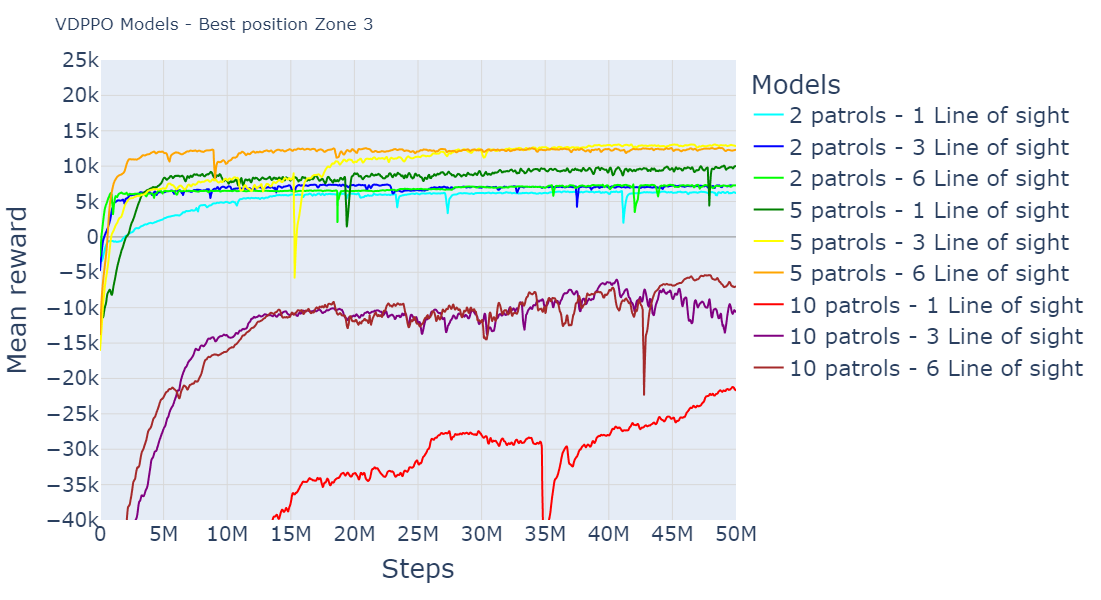

In [92]:
fig_t_1 =  px.scatter(x=k1, y=v1, color=c1,
                     color_discrete_sequence=["cyan", "blue", "lime", "green", "yellow", "orange", "red", "purple", "brown"],
                      trendline="lowess", trendline_options=dict(frac=0.005)
#                       trendline_scope="overall",trendline_color_override="grey"
                     )

# fig_t_1.update_traces(mode="markers")
fig_t_1.update_traces(visible=False, selector=dict(mode="markers"))
fig_t_1.update_xaxes(title_text='Steps',showgrid=True, gridwidth=1, gridcolor='#d8d8d8', dtick=10_000_000, range=[-250, 100_000_000],
                     tickfont=dict(size=20),titlefont=dict(size=26))
fig_t_1.update_yaxes(title_text='Mean reward',showgrid=True, gridwidth=1, gridcolor='#d8d8d8',
                     zeroline=True, zerolinewidth=1, zerolinecolor='#8C8C8C', dtick=5000, range=[-40000, 25000],
                     tickfont=dict(size=20),titlefont=dict(size=26))
fig_t_1.update_layout(title='VDPPO Models - Best position Zone 3',legend=dict(
    title = 'Models',font=dict(size=22)))
fig_t_1.update_traces(showlegend=True, selector=dict(mode='lines'))
fig_t_1.update_layout(
    autosize=False,
    width=1000,
    height=600,
)
fig_t_1